# EVENTOS
## PROJETO DE ANÁLISE

### PERGUNTAS
#### 1. Qual o tipo de ticket mais comprado?
#### 2. Região com maior número de eventos
#### 3. Ranking de setores mais vendidos
#### 4. Setores reservados, vendidos e livres por eventos

In [45]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Carregamento dos dados e tratativas

In [46]:
df = pd.read_csv(r'C:\Users\Estudos\Documents\P_Eventos\eventos_dados.csv', encoding='latin1', sep='\t')
df

,ticket_id,event_name,location,organization,event_date,capacity,spot_name,status,ticket_kind,price
0,1def08f1-6219-4da4-87ce-476f1604fff6,Event 003 - Partner2,"Belo Horizonte, MG",Partner 2,10/10/2024,10,A4,sold,Half,200
1,1e9f3ede-f7bb-4c99-9121-7b4357488841,Event 001 - Partner1,"São Paulo, SP",Partner 1,10/10/2021,10,B1,available,Full,100
2,2d6eb518-e355-4388-ab8d-0959d6dbeafe,Event 004 - Partner2,"Uberlândia, MG",Partner 2,10/10/2024,10,B1,available,Half,250
3,324301e2-bf77-4f15-b3a1-12d52219c635,Event 004 - Partner2,"Uberlândia, MG",Partner 2,10/10/2024,10,B1,available,Full,500
4,39189eda-f4e2-4251-b764-57fbcb0421f1,Event 002 - Partner1,"Rio de Janeiro, RJ",Partner 1,10/10/2021,10,B3,reserved,Full,200
5,47a7a57d-4a95-40f3-8f87-bd3edada10c6,Event 002 - Partner1,"Rio de Janeiro, RJ",Partner 1,10/10/2021,10,A1,sold,Full,200
6,4eb90745-44d0-4a59-8c49-1888090edd60,Event 001 - Partner1,"São Paulo, SP",Partner 1,10/10/2021,10,B3,reserved,Full,100
7,5f6e367e-06d8-4dce-b26a-7846c1961c73,Event 001 - Partner1,"São Paulo, SP",Partner 1,10/10/2021,10,B3,reserved,Half,50
8,70652891-754e-44aa-bac4-88f3bb1173df,Event 004 - Partner2,"Uberlândia, MG",Partner 2,10/10/2024,10,B1,available,Full,500
9,7a36ca3c-d557-490f-9a0c-851c6bd1f3a5,Event 004 - Partner2,"Uberlândia, MG",Partner 2,10/10/2024,10,B3,reserved,Full,500


In [47]:
# Verificando de há valores ausentes
df.isnull().sum()

ticket_id       0
event_name      0
location        0
organization    0
event_date      0
capacity        0
spot_name       0
status          0
ticket_kind     0
price           0
dtype: int64

In [48]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ticket_id,event_name,location,organization,event_date,capacity,spot_name,status,ticket_kind,price


In [49]:
# Resumo estatístico
df['price'].describe()

count     17.000000
mean     235.294118
std      138.929733
min       50.000000
25%      200.000000
50%      200.000000
75%      250.000000
max      500.000000
Name: price, dtype: float64

In [50]:
# Convertendo 'location' para string
df['location'] = df['location'].astype(str)

## Análise
### Ticket mais comprado

In [51]:
#Criando o dataframe
df_q1 = df.groupby(['ticket_kind','event_name'])['price'].sum().reset_index().sort_values('event_name')
df_q1

,ticket_kind,event_name,price
0,Full,Event 001 - Partner1,200
3,Half,Event 001 - Partner1,50
1,Full,Event 002 - Partner1,800
4,Half,Event 002 - Partner1,100
5,Half,Event 003 - Partner2,600
2,Full,Event 004 - Partner2,1500
6,Half,Event 004 - Partner2,750


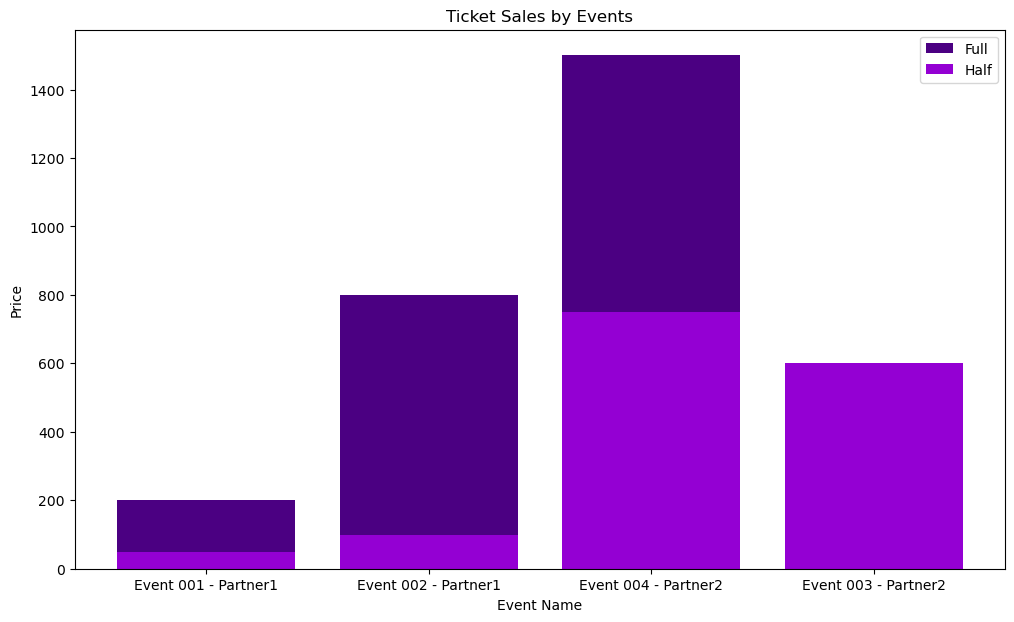

In [69]:
# Filtragem para plotagem do gráfico
df_q1_half = df_q1[df_q1['ticket_kind'] == 'Half']
df_q1_full = df_q1[df_q1['ticket_kind'] == 'Full']

# Plotagem do gráfico
plt.figure(figsize=(12, 7))
barsq1_full = plt.bar(df_q1_full['event_name'], df_q1_full['price'], label='Full', color = 'indigo')
barsq1_half = plt.bar(df_q1_half['event_name'], df_q1_half['price'], label='Half', color = 'darkviolet')

# Adicionando rótulos e título
plt.xlabel('Event Name')
plt.ylabel('Price')
plt.title('Ticket Sales by Events')
plt.legend()

# Exibindo o gráfico
plt.show()

### Eventos por Região

In [56]:
#Criando df
df_q2 = df.groupby('location')['event_name'].count().reset_index()
df_q2['location'] = df_q2['location'].astype(str)
df_q2

,location,event_name
0,"Belo Horizonte, MG",3
1,"Rio de Janeiro, RJ",5
2,"São Paulo, SP",3
3,"Uberlândia, MG",6


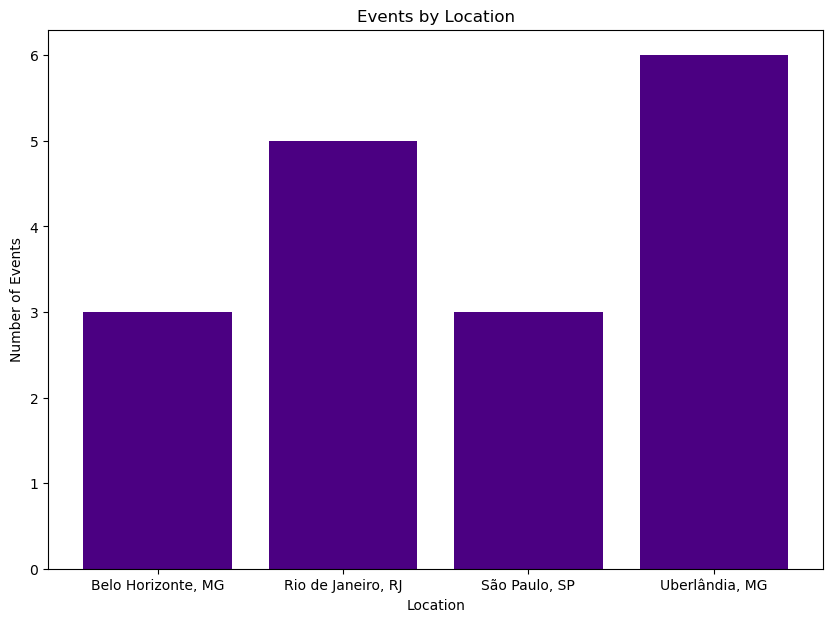

In [68]:
#Plotagem do gráfico
plt.figure(figsize=(10,7))
plt.bar(df_q2['location'], df_q2['event_name'], color= 'indigo')

#Adicionando rótulos e títulos
plt.title('Events by Location')
plt.ylabel('Number of Events')
plt.xlabel('Location')

#Exibindo gráfico
plt.show()

### Setores mais Vendidos

In [67]:
#Criando df
df_q3 = df.groupby(['event_name','spot_name'])['price'].sum().reset_index().sort_values('event_name')
df_q3

,event_name,spot_name,price
0,Event 001 - Partner1,B1,100
1,Event 001 - Partner1,B3,150
2,Event 002 - Partner1,A1,200
3,Event 002 - Partner1,A4,300
4,Event 002 - Partner1,B3,400
5,Event 003 - Partner2,A4,200
6,Event 003 - Partner2,B1,200
7,Event 003 - Partner2,B3,200
8,Event 004 - Partner2,B1,1750
9,Event 004 - Partner2,B3,500


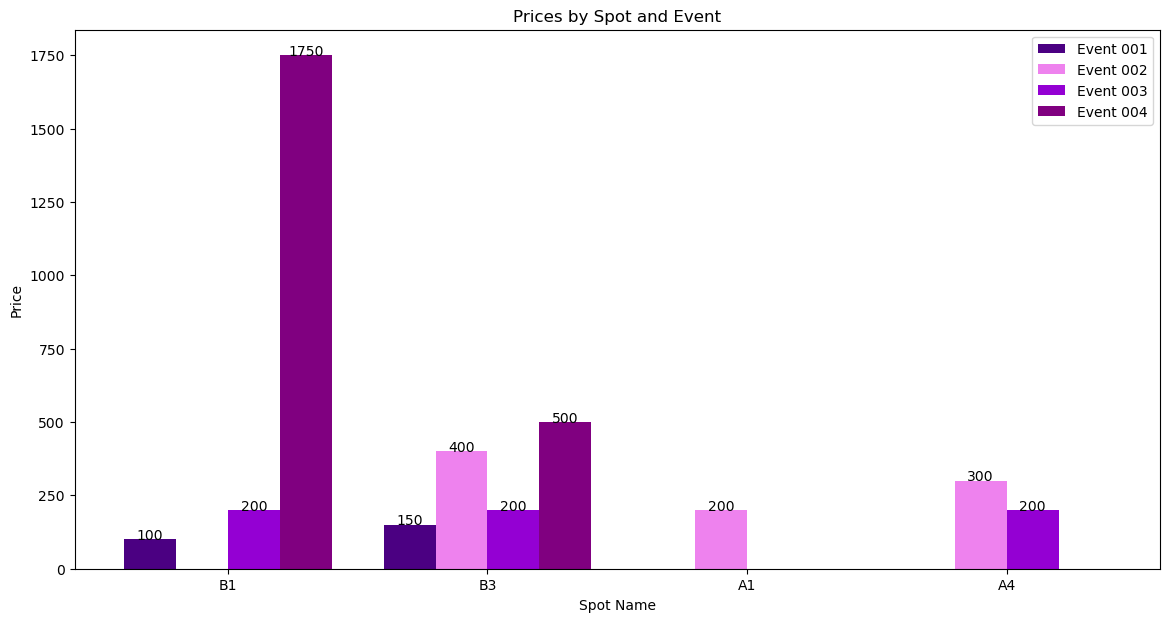

In [105]:
# Filtragem para plot do gráfico
df_q3_e1 = df_q3[df_q3['event_name'].str.contains('Event 001')].set_index('spot_name')
df_q3_e2 = df_q3[df_q3['event_name'].str.contains('Event 002')].set_index('spot_name')
df_q3_e3 = df_q3[df_q3['event_name'].str.contains('Event 003')].set_index('spot_name')
df_q3_e4 = df_q3[df_q3['event_name'].str.contains('Event 004')].set_index('spot_name')

# Garantir que todos os DataFrames tenham os mesmos índices
all_spots = df_q3['spot_name'].unique()
df_q3_e1 = df_q3_e1.reindex(all_spots, fill_value=0)
df_q3_e2 = df_q3_e2.reindex(all_spots, fill_value=0)
df_q3_e3 = df_q3_e3.reindex(all_spots, fill_value=0)
df_q3_e4 = df_q3_e4.reindex(all_spots, fill_value=0)

# Posição das barras no eixo x
x = np.arange(len(all_spots))

# Largura das barras
bar_width = 0.2

# Plotagem do gráfico
plt.figure(figsize=(14, 7))
barsq3_e1 = plt.bar(x - 1.5 * bar_width, df_q3_e1['price'], width=bar_width, color='indigo', label='Event 001')
barsq3_e2 = plt.bar(x - 0.5 * bar_width, df_q3_e2['price'], width=bar_width, color='violet', label='Event 002')
barsq3_e3 = plt.bar(x + 0.5 * bar_width, df_q3_e3['price'], width=bar_width, color='darkviolet', label='Event 003')
barsq3_e4 = plt.bar(x + 1.5 * bar_width, df_q3_e4['price'], width=bar_width, color='purple', label='Event 004')

# Adicionando valores dentro das barras
for bar in barsq3_e1:
    height = bar.get_height()
    if height != 0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, str(bar.get_height()), ha='center', va='bottom', color='black')
for bar in barsq3_e2:
    height = bar.get_height()
    if height != 0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, str(bar.get_height()), ha='center', va='bottom', color='black')
for bar in barsq3_e3:
    height = bar.get_height()
    if height != 0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, str(bar.get_height()), ha='center', va='bottom', color='black')
for bar in barsq3_e4:
    height = bar.get_height()
    if height != 0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, str(bar.get_height()), ha='center', va='bottom', color='black')

# Adicionando rótulos e título
plt.xlabel('Spot Name')
plt.ylabel('Price')
plt.title('Prices by Spot and Event')
plt.xticks(x, all_spots, rotation=0)
plt.legend()


# Exibindo gráfico
plt.show()

### Status dos Setores por Evento

In [97]:
df_q4 = df.groupby(['event_name', 'spot_name','status']).sum().reset_index()
df_q4


,event_name,spot_name,status,capacity,price
0,Event 001 - Partner1,B1,available,10,100
1,Event 001 - Partner1,B3,reserved,20,150
2,Event 002 - Partner1,A1,sold,10,200
3,Event 002 - Partner1,A4,sold,20,300
4,Event 002 - Partner1,B3,reserved,20,400
5,Event 003 - Partner2,A4,sold,10,200
6,Event 003 - Partner2,B1,available,10,200
7,Event 003 - Partner2,B3,reserved,10,200
8,Event 004 - Partner2,B1,available,30,1250
9,Event 004 - Partner2,B1,sold,20,500
